# Fit Circle
Generate points distributed with some errors around a circle
Fit a circle through the points and draw
To run the script, do, eg

```cpp
  root > .x fitCircle.C   (10000 points by default)
  root > .x fitCircle.C(100);  (with only 100 points
  root > .x fitCircle.C(100000);  with ACLIC
```




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:28 AM.</small></i>

In [1]:
%%cpp -d
#include "TCanvas.h"
#include "TRandom3.h"
#include "TGraph.h"
#include "TMath.h"
#include "TArc.h"
#include "Fit/Fitter.h"

____________________________________________________________________

 Arguments are defined. 

In [2]:
Int_t n=10000;

Generates n points around a circle and fit them

In [3]:
TCanvas *c1 = new TCanvas("c1","c1",600,600);
c1->SetGrid();
TGraph* gr = new TGraph(n);
if (n> 999) gr->SetMarkerStyle(1);
else        gr->SetMarkerStyle(3);
TRandom3 r;
Double_t x,y;
for (Int_t i=0;i<n;i++) {
   r.Circle(x,y,r.Gaus(4,0.3));
   gr->SetPoint(i,x,y);
}
c1->DrawFrame(-5,-5,5,5);
gr->Draw("p");


auto chi2Function = [&](const Double_t *par) {
   //minimisation function computing the sum of squares of residuals
   // looping at the graph points
   Int_t np = gr->GetN();
   Double_t f = 0;
   Double_t *x = gr->GetX();
   Double_t *y = gr->GetY();
   for (Int_t i=0;i<np;i++) {
      Double_t u = x[i] - par[0];
      Double_t v = y[i] - par[1];
      Double_t dr = par[2] - std::sqrt(u*u+v*v);
      f += dr*dr;
   }
   return f;
};

Wrap chi2 funciton in a function object for the fit
 3 is the number of fit parameters (size of array par)

In [4]:
ROOT::Math::Functor fcn(chi2Function,3);
ROOT::Fit::Fitter  fitter;


double pStart[3] = {0,0,1};
fitter.SetFCN(fcn, pStart);
fitter.Config().ParSettings(0).SetName("x0");
fitter.Config().ParSettings(1).SetName("y0");
fitter.Config().ParSettings(2).SetName("R");

Do the fit 

In [5]:
bool ok = fitter.FitFCN();
if (!ok) {
   Error("line3Dfit","Line3D Fit failed");
}   

const ROOT::Fit::FitResult & result = fitter.Result();
result.Print(std::cout);


****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      903.174
NDf                       =            0
Edm                       =  2.25062e-09
NCalls                    =           72
x0                        =   0.00667777   +/-   0.0141774   
y0                        =   0.00536467   +/-   0.0141954   
R                         =        3.995   +/-   0.0100048   


Draw the circle on top of the points

In [6]:
TArc *arc = new TArc(result.Parameter(0),result.Parameter(1),result.Parameter(2));
arc->SetLineColor(kRed);
arc->SetLineWidth(4);
arc->Draw();

Draw all canvases 

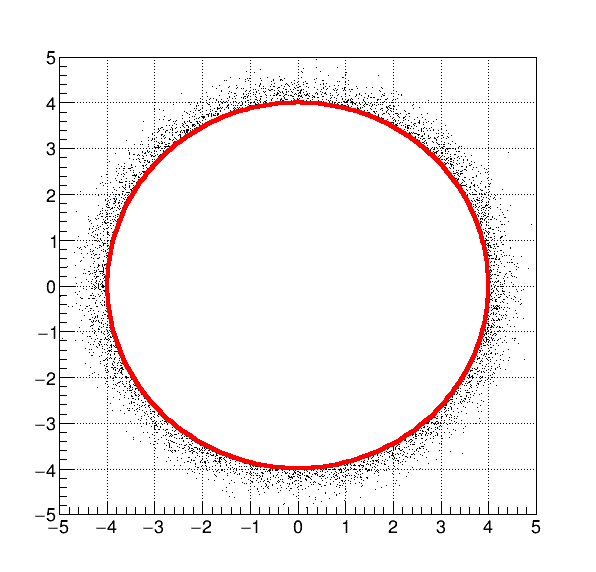

In [7]:
gROOT->GetListOfCanvases()->Draw()